<a href="https://colab.research.google.com/github/kareemullah123456789/big_data_advanced/blob/main/section_5_broadcast_canada_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
 from pyspark.sql import SparkSession
 import pyspark.sql.functions as F
 spark = SparkSession.builder.getOrCreate()

In [6]:
!ls /content/drive/MyDrive/cde_data/broadcast_logs/ReferenceTables

BroadcastProducers.csv	     CD_ClosedCaption.csv    CD_FilmClassification.csv
CD_AirLanguage.csv	     CD_Composition.csv      CD_NetworkAffiliation.csv
CD_AudienceTargetAge.csv     CD_CountryOfOrigin.csv  CD_ProductionSource.csv
CD_AudienceTargetEthnic.csv  CD_DubDramaCredit.csv   CD_ProgramClass.csv
CD_BroadcastOriginPoint.csv  CD_EthnicProgram.csv    CD_SpecialAttention.csv
CD_Category.csv		     CD_Exhibition.csv	     LogIdentifier.csv


In [7]:
import os

DIRECTORY = "/content/drive/MyDrive/cde_data/broadcast_logs/"

log_identifier = spark.read.csv(
    os.path.join(DIRECTORY, "ReferenceTables/LogIdentifier.csv"),
    sep="|",
    header=True,
    inferSchema=True,
)

log_identifier.printSchema()


root
 |-- LogIdentifierID: string (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- PrimaryFG: integer (nullable = true)



In [9]:
log_identifier = log_identifier.where(F.col("PrimaryFG") == 1)
print(log_identifier.count())

758


In [10]:
 log_identifier.show(5)

+---------------+------------+---------+
|LogIdentifierID|LogServiceID|PrimaryFG|
+---------------+------------+---------+
|           13ST|        3157|        1|
|         2000SM|        3466|        1|
|           70SM|        3883|        1|
|           80SM|        3590|        1|
|           90SM|        3470|        1|
+---------------+------------+---------+
only showing top 5 rows



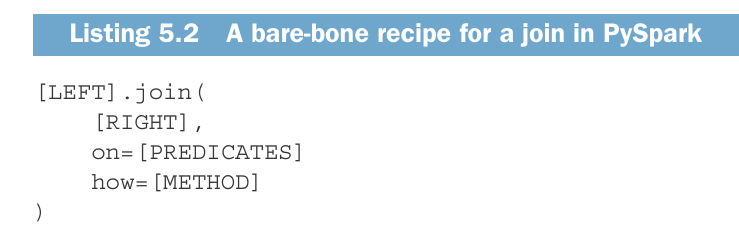

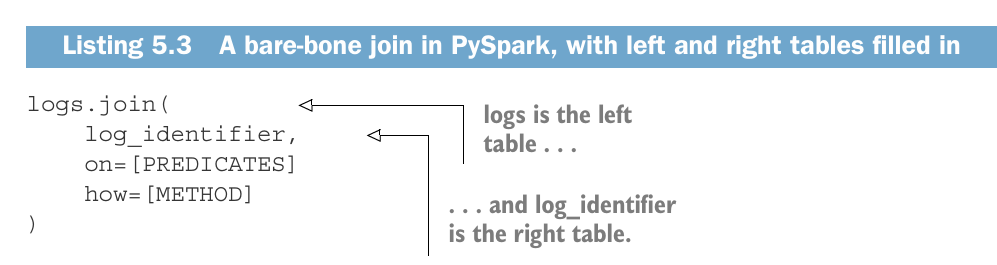

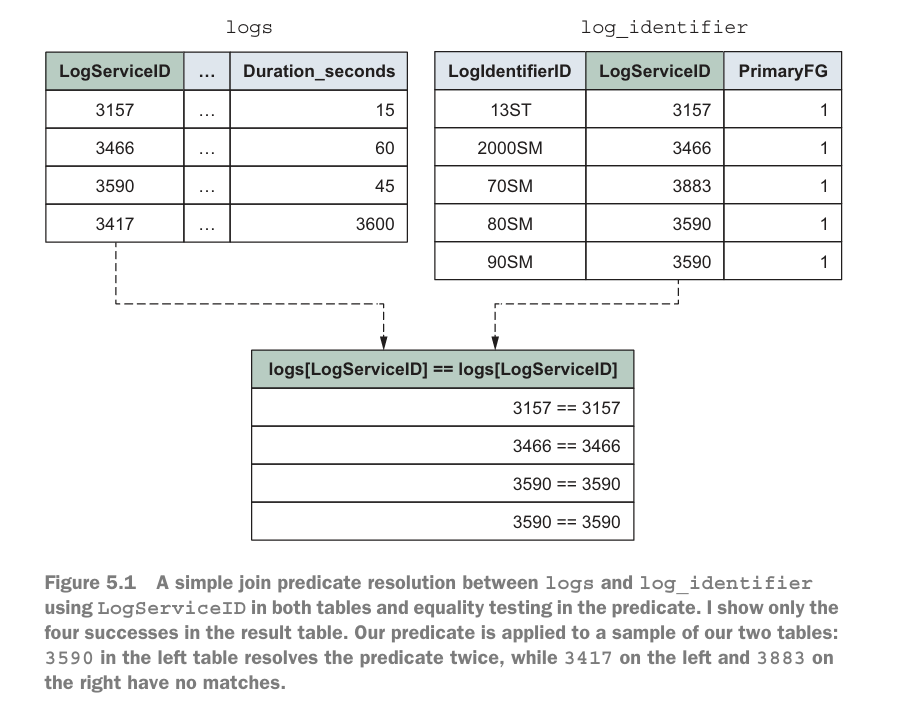

In [18]:

DIRECTORY = "/content/drive/MyDrive/cde_data/broadcast_logs"
logs = (
    spark.read.csv(
        os.path.join(DIRECTORY, "BroadcastLogs_2018_Q3_M8_sample.CSV"),
        sep="|",
        header=True,
        inferSchema=True,
        timestampFormat="yyyy-MM-dd",
    )
    .drop("BroadcastLogID", "SequenceNO")
    .withColumn(
        "duration_seconds",
        (
            F.col("Duration").substr(1, 2).cast("int") * 60 * 60
            + F.col("Duration").substr(4, 2).cast("int") * 60
            + F.col("Duration").substr(7, 2).cast("int")
        ),
    )
)

logs.show(5)

+------------+----------+-------------------+----------------------+----------+---------------+-----------------+----------------+---------------+------------------+--------------+--------------------+------------+----------------+----------------+------------+------------+--------------------+----------------+--------+--------------------+------------------+----------------------+-------------+---------+---------+---------+---------+----------------+
|LogServiceID|   LogDate|AudienceTargetAgeID|AudienceTargetEthnicID|CategoryID|ClosedCaptionID|CountryOfOriginID|DubDramaCreditID|EthnicProgramID|ProductionSourceID|ProgramClassID|FilmClassificationID|ExhibitionID|        Duration|         EndTime|LogEntryDate|ProductionNO|        ProgramTitle|       StartTime|Subtitle|NetworkAffiliationID|SpecialAttentionID|BroadcastOriginPointID|CompositionID|Producer1|Producer2|Language1|Language2|duration_seconds|
+------------+----------+-------------------+----------------------+----------+---------

In [14]:
#  logs = logs.withColumnRenamed("Duration_seconds", "duration_seconds")
# #  logs.printSchema()

root
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- SpecialAttentionID: inte

In [15]:
# logs.toDF(*[x.lower() for x in logs.columns]).printSchema()

root
 |-- logserviceid: integer (nullable = true)
 |-- logdate: date (nullable = true)
 |-- audiencetargetageid: integer (nullable = true)
 |-- audiencetargetethnicid: integer (nullable = true)
 |-- categoryid: integer (nullable = true)
 |-- closedcaptionid: integer (nullable = true)
 |-- countryoforiginid: integer (nullable = true)
 |-- dubdramacreditid: integer (nullable = true)
 |-- ethnicprogramid: integer (nullable = true)
 |-- productionsourceid: integer (nullable = true)
 |-- programclassid: integer (nullable = true)
 |-- filmclassificationid: integer (nullable = true)
 |-- exhibitionid: integer (nullable = true)
 |-- duration: string (nullable = true)
 |-- endtime: string (nullable = true)
 |-- logentrydate: date (nullable = true)
 |-- productionno: string (nullable = true)
 |-- programtitle: string (nullable = true)
 |-- starttime: string (nullable = true)
 |-- subtitle: string (nullable = true)
 |-- networkaffiliationid: integer (nullable = true)
 |-- specialattentionid: inte

In [16]:
#  logs.select(sorted(logs.columns)).printSchema()

root
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- BroadcastOriginPointID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CompositionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- Language1: integer (nullable = true)
 |-- Language2: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- Producer1: string (nullable = true)
 |-- Producer2: string (nullable = true)
 |-- ProductionNO: string (nu

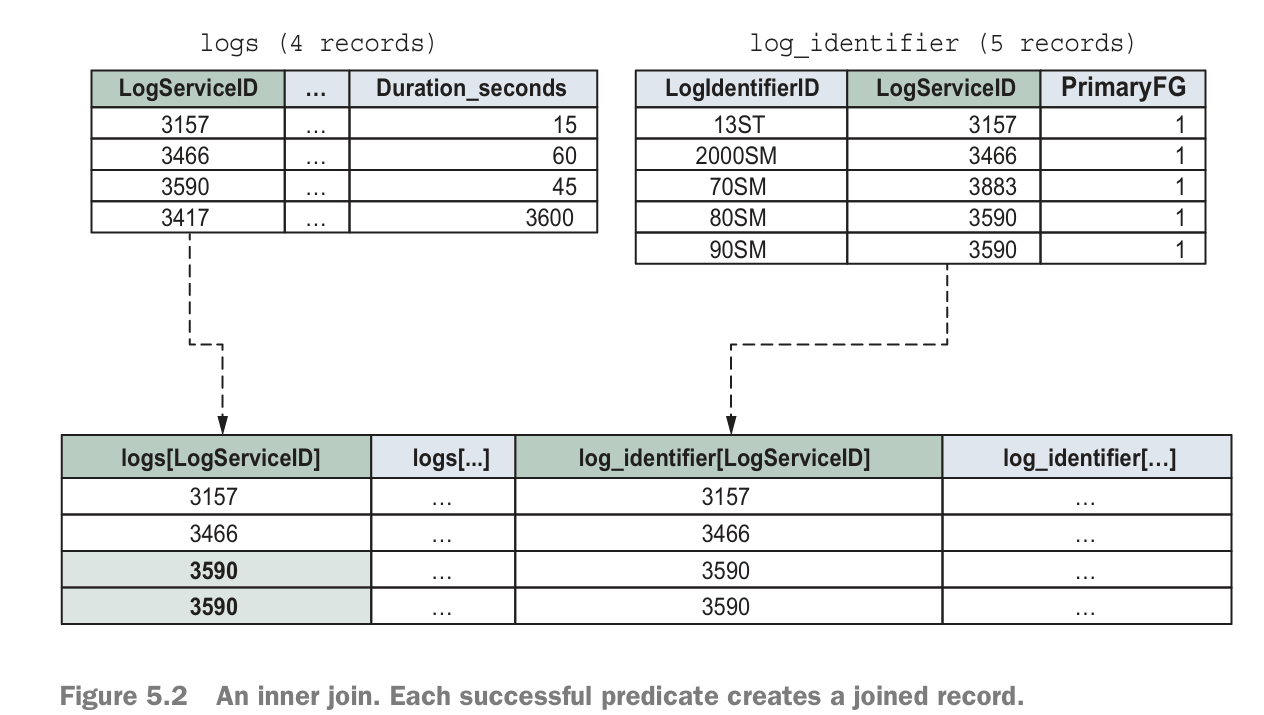

In [19]:
# logs.join(
#     log_identifier,
#     on="LogServiceID"
#     how=[METHOD]
#  )

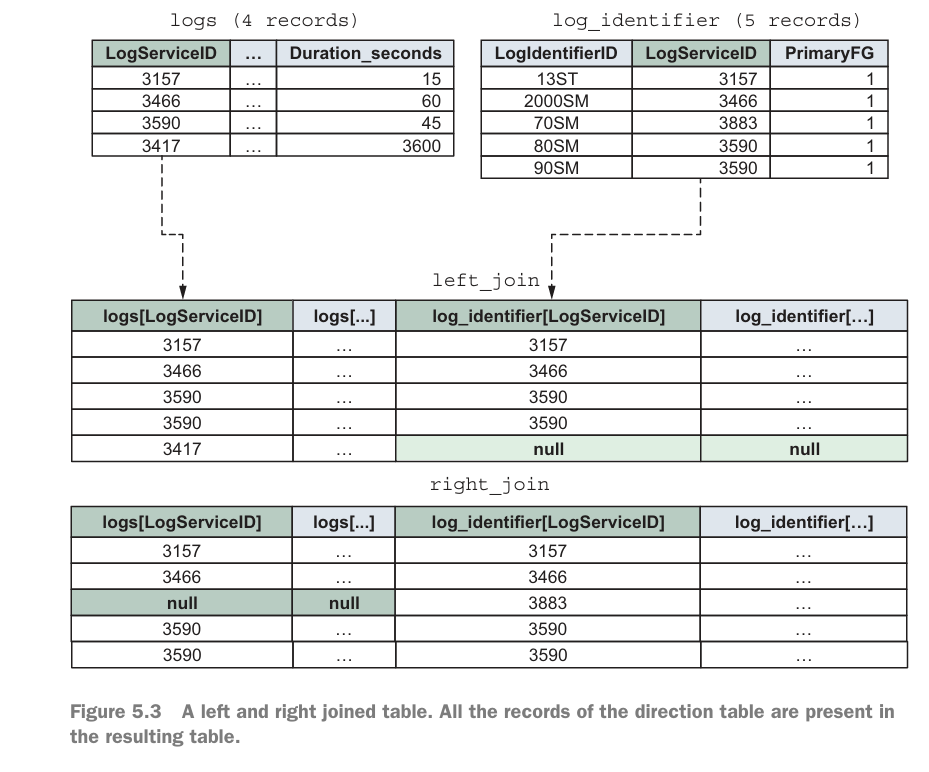

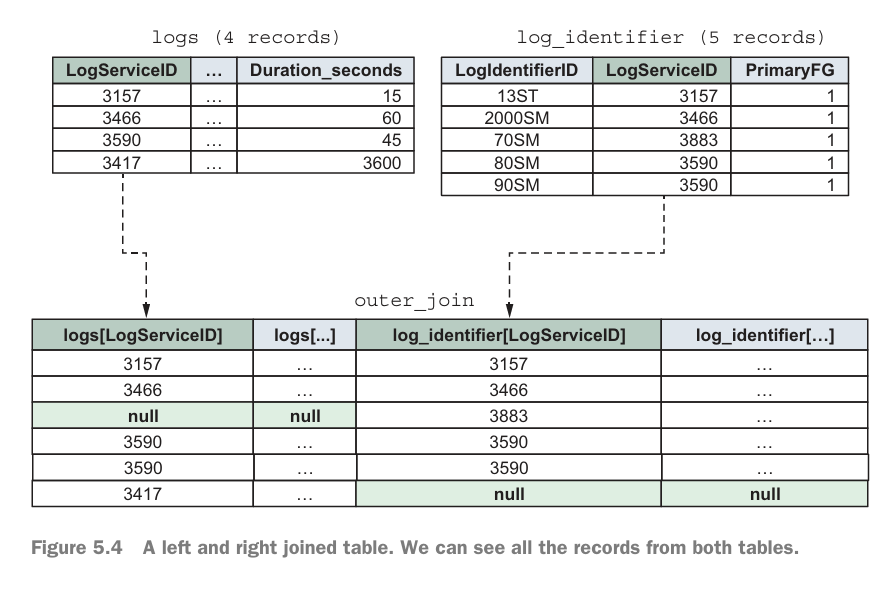

In [20]:
logs_and_channels = logs.join(
    log_identifier,
    on="LogServiceID",
    how="inner"
)

CROSS JOIN: THE NUCLEAR OPTION

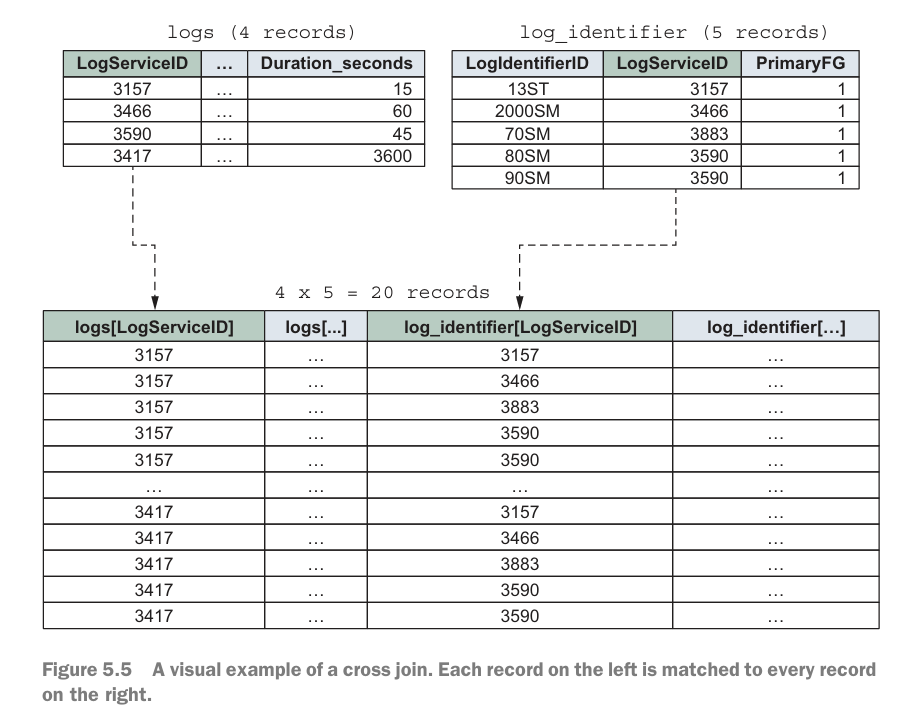

In [22]:
logs_and_channels_verbose = logs.join(
    log_identifier, logs["LogServiceID"] == log_identifier["LogServiceID"]
 )
logs_and_channels_verbose.printSchema()

root
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- SpecialAttentionID: inte

In [21]:
logs_and_channels = logs.join(log_identifier, "LogServiceID")
logs_and_channels.printSchema()

root
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: date (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: date (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- NetworkAffiliationID: integer (nullable = true)
 |-- SpecialAttentionID: inte

In [23]:
logs_and_channels_verbose = logs.join(
    log_identifier, logs["LogServiceID"] == log_identifier["LogServiceID"]
 )
logs_and_channels.drop(log_identifier["LogServiceID"]).select(
    "LogServiceID")

DataFrame[LogServiceID: int]

In [24]:
logs_and_channels_verbose = logs.alias("left").join(
    log_identifier.alias("right"),
    logs["LogServiceID"] == log_identifier["LogServiceID"],
)

In [25]:
logs_and_channels_verbose.drop(F.col("right.LogServiceID")).select("LogServiceID")

DataFrame[LogServiceID: int]

In [26]:
cd_category = spark.read.csv(
    os.path.join(DIRECTORY, "ReferenceTables/CD_Category.csv"),
    sep="|",
    header=True,
    inferSchema=True,
).select(
    "CategoryID",
    "CategoryCD",
    F.col("EnglishDescription").alias("Category_Description"),
)

In [27]:
cd_program_class = spark.read.csv(
    os.path.join(DIRECTORY, "ReferenceTables/CD_ProgramClass.csv"),
    sep="|",
    header=True,
    inferSchema=True,
).select(
    "ProgramClassID",
    "ProgramClassCD",
    F.col("EnglishDescription").alias("ProgramClass_Description"),
)

In [28]:
full_log = logs_and_channels.join(cd_category, "CategoryID", how="left").join(
 cd_program_class, "ProgramClassID", how="left"
 )

In [29]:

(full_log
 .groupby("ProgramClassCD", "ProgramClass_Description")
 .agg(F.sum("duration_seconds").alias("duration_total"))
 .orderBy("duration_total", ascending=False).show(100, False)
 )

+--------------+--------------------------------------+--------------+
|ProgramClassCD|ProgramClass_Description              |duration_total|
+--------------+--------------------------------------+--------------+
|PGR           |PROGRAM                               |20992510      |
|COM           |COMMERCIAL MESSAGE                    |3519163       |
|PFS           |PROGRAM FIRST SEGMENT                 |1344762       |
|SEG           |SEGMENT OF A PROGRAM                  |1205998       |
|PRC           |PROMOTION OF UPCOMING CANADIAN PROGRAM|880600        |
|PGI           |PROGRAM INFOMERCIAL                   |679182        |
|PRO           |PROMOTION OF NON-CANADIAN PROGRAM     |335701        |
|OFF           |SCHEDULED OFF AIR TIME PERIOD         |142279        |
|ID            |NETWORK IDENTIFICATION MESSAGE        |74926         |
|NRN           |No recognized nationality             |59686         |
|MAG           |MAGAZINE PROGRAM                      |57622         |
|PSA  

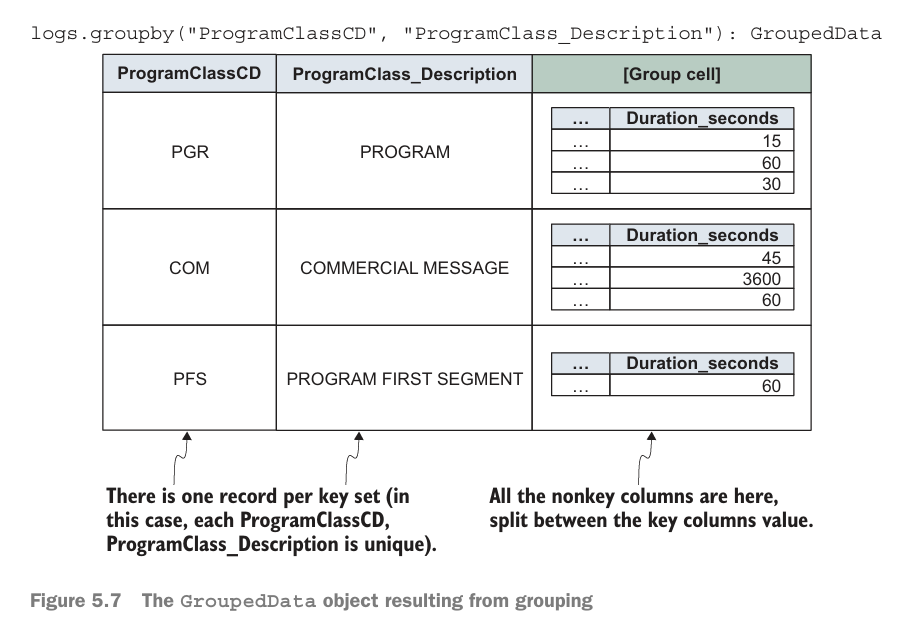

In [30]:
full_log.groupby("ProgramClassCD", "ProgramClass_Description").agg(
    {"duration_seconds": "sum"}
 ).withColumnRenamed("sum(duration_seconds)", "duration_total").orderBy(
    "duration_total", ascending=False
 ).show(
    100, False
 )

+--------------+--------------------------------------+--------------+
|ProgramClassCD|ProgramClass_Description              |duration_total|
+--------------+--------------------------------------+--------------+
|PGR           |PROGRAM                               |20992510      |
|COM           |COMMERCIAL MESSAGE                    |3519163       |
|PFS           |PROGRAM FIRST SEGMENT                 |1344762       |
|SEG           |SEGMENT OF A PROGRAM                  |1205998       |
|PRC           |PROMOTION OF UPCOMING CANADIAN PROGRAM|880600        |
|PGI           |PROGRAM INFOMERCIAL                   |679182        |
|PRO           |PROMOTION OF NON-CANADIAN PROGRAM     |335701        |
|OFF           |SCHEDULED OFF AIR TIME PERIOD         |142279        |
|ID            |NETWORK IDENTIFICATION MESSAGE        |74926         |
|NRN           |No recognized nationality             |59686         |
|MAG           |MAGAZINE PROGRAM                      |57622         |
|PSA  

In [33]:
full_log.groupby()

GroupedData[grouping expressions: [], value: [ProgramClassID: int, CategoryID: int ... 33 more fields], type: GroupBy]

In [35]:
logs.groupby(
    "ProgramClassCD", "ProgramClass_Description"
).agg(
    F.sum(F.col("Duration_seconds")).alias("Total_Duration")
)

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `ProgramClassCD` cannot be resolved. Did you mean one of the following? [`ProgramClassID`, `ProgramTitle`, `LogDate`, `Duration`, `Language1`].;
'Aggregate ['ProgramClassCD, 'ProgramClass_Description], ['ProgramClassCD, 'ProgramClass_Description, sum(Duration_seconds#553) AS Total_Duration#1484L]
+- Project [LogServiceID#465, LogDate#466, AudienceTargetAgeID#468, AudienceTargetEthnicID#469, CategoryID#470, ClosedCaptionID#471, CountryOfOriginID#472, DubDramaCreditID#473, EthnicProgramID#474, ProductionSourceID#475, ProgramClassID#476, FilmClassificationID#477, ExhibitionID#478, Duration#479, EndTime#480, LogEntryDate#481, ProductionNO#482, ProgramTitle#483, StartTime#484, Subtitle#485, NetworkAffiliationID#486, SpecialAttentionID#487, BroadcastOriginPointID#488, CompositionID#489, ... 5 more fields]
   +- Project [LogServiceID#465, LogDate#466, AudienceTargetAgeID#468, AudienceTargetEthnicID#469, CategoryID#470, ClosedCaptionID#471, CountryOfOriginID#472, DubDramaCreditID#473, EthnicProgramID#474, ProductionSourceID#475, ProgramClassID#476, FilmClassificationID#477, ExhibitionID#478, Duration#479, EndTime#480, LogEntryDate#481, ProductionNO#482, ProgramTitle#483, StartTime#484, Subtitle#485, NetworkAffiliationID#486, SpecialAttentionID#487, BroadcastOriginPointID#488, CompositionID#489, ... 4 more fields]
      +- Relation [BroadcastLogID#464,LogServiceID#465,LogDate#466,SequenceNO#467,AudienceTargetAgeID#468,AudienceTargetEthnicID#469,CategoryID#470,ClosedCaptionID#471,CountryOfOriginID#472,DubDramaCreditID#473,EthnicProgramID#474,ProductionSourceID#475,ProgramClassID#476,FilmClassificationID#477,ExhibitionID#478,Duration#479,EndTime#480,LogEntryDate#481,ProductionNO#482,ProgramTitle#483,StartTime#484,Subtitle#485,NetworkAffiliationID#486,SpecialAttentionID#487,... 6 more fields] csv


In [36]:
F.when(
 F.trim(F.col("ProgramClassCD")).isin(
 ["COM", "PRC", "PGI", "PRO", "PSA", "MAG", "LOC", "SPO", "MER", "SOL"]
 ),
 F.col("duration_seconds"),
 ).otherwise(0)

Column<'CASE WHEN (trim(ProgramClassCD) IN (COM, PRC, PGI, PRO, PSA, MAG, LOC, SPO, MER, SOL)) THEN duration_seconds ELSE 0 END'>

In [37]:
full_log.groupby("LogIdentifierID")

GroupedData[grouping expressions: [LogIdentifierID], value: [ProgramClassID: int, CategoryID: int ... 33 more fields], type: GroupBy]

In [38]:
# Ensure necessary imports
from pyspark.sql import functions as F

# Perform grouping and aggregation
answer = (
    full_log.groupby("LogIdentifierID")
    .agg(
        F.sum(
            F.when(
                F.trim(F.col("ProgramClassCD")).isin(
                    ["COM", "PRC", "PGI", "PRO", "LOC", "SPO", "MER", "SOL"]
                ),
                F.col("duration_seconds"),
            ).otherwise(0)
        ).alias("duration_commercial"),
        F.sum("duration_seconds").alias("duration_total"),
    )
    .withColumn(
        "commercial_ratio",
        F.when(F.col("duration_total") != 0, F.col("duration_commercial") / F.col("duration_total"))
        .otherwise(0),
    )
)

# Sort and display results
answer.orderBy("commercial_ratio", ascending=False).show(1000, False)

+---------------+-------------------+--------------+---------------------+
|LogIdentifierID|duration_commercial|duration_total|commercial_ratio     |
+---------------+-------------------+--------------+---------------------+
|CIMT           |775                |775           |1.0                  |
|TLNSP          |15480              |15480         |1.0                  |
|TELENO         |17790              |17790         |1.0                  |
|MSET           |2700               |2700          |1.0                  |
|HPITV          |13                 |13            |1.0                  |
|TANG           |8125               |8125          |1.0                  |
|MMAX           |23333              |23582         |0.9894410991434145   |
|MPLU           |20587              |20912         |0.9844586840091814   |
|INVST          |20094              |20470         |0.9816316560820714   |
|ZT�L�          |21542              |21965         |0.9807420896881403   |
|RAPT           |17916   

In [39]:
answer_no_null = answer.dropna(subset=["commercial_ratio"])
answer_no_null.orderBy(
    "commercial_ratio", ascending=False).show(1000, False)

+---------------+-------------------+--------------+---------------------+
|LogIdentifierID|duration_commercial|duration_total|commercial_ratio     |
+---------------+-------------------+--------------+---------------------+
|CIMT           |775                |775           |1.0                  |
|TLNSP          |15480              |15480         |1.0                  |
|TELENO         |17790              |17790         |1.0                  |
|MSET           |2700               |2700          |1.0                  |
|HPITV          |13                 |13            |1.0                  |
|TANG           |8125               |8125          |1.0                  |
|MMAX           |23333              |23582         |0.9894410991434145   |
|MPLU           |20587              |20912         |0.9844586840091814   |
|INVST          |20094              |20470         |0.9816316560820714   |
|ZT�L�          |21542              |21965         |0.9807420896881403   |
|RAPT           |17916   

In [41]:
answer_no_null = answer.fillna(0)
answer_no_null.orderBy(
    "commercial_ratio", ascending=False).show(1000, False)

+---------------+-------------------+--------------+---------------------+
|LogIdentifierID|duration_commercial|duration_total|commercial_ratio     |
+---------------+-------------------+--------------+---------------------+
|CIMT           |775                |775           |1.0                  |
|TLNSP          |15480              |15480         |1.0                  |
|TELENO         |17790              |17790         |1.0                  |
|MSET           |2700               |2700          |1.0                  |
|HPITV          |13                 |13            |1.0                  |
|TANG           |8125               |8125          |1.0                  |
|MMAX           |23333              |23582         |0.9894410991434145   |
|MPLU           |20587              |20912         |0.9844586840091814   |
|INVST          |20094              |20470         |0.9816316560820714   |
|ZT�L�          |21542              |21965         |0.9807420896881403   |
|RAPT           |17916   

In [42]:
 answer_no_null = answer.fillna(
    {"duration_commercial": 0, "duration_total": 0, "commercial_ratio": 0}
 )



### **PySpark Join Functionalities**

PySpark implements seven join functionalities, which can be understood using the common “what?,” “on what?,” and “how?” questions:

1. **Cross Join**: Combines every row from the left DataFrame with every row from the right DataFrame.
2. **Inner Join**: Returns only the rows that have matching keys in both DataFrames.
3. **Left Join**: Returns all rows from the left DataFrame and the matched rows from the right DataFrame. Unmatched rows from the right are filled with `null`.
4. **Right Join**: Returns all rows from the right DataFrame and the matched rows from the left DataFrame. Unmatched rows from the left are filled with `null`.
5. **Full Join**: Returns all rows when there is a match in either the left or the right DataFrame.
6. **Left Semi Join**: Returns only the rows from the left DataFrame that have matching keys in the right DataFrame (similar to an inner join but without including columns from the right DataFrame).
7. **Left Anti Join**: Returns only the rows from the left DataFrame that do not have matching keys in the right DataFrame.

Choosing the appropriate join method depends on how to process the records that resolve the predicates and those that do not.

---

### **Lineage Information in PySpark Joins**

- PySpark keeps lineage information when joining DataFrames. Using this information, we can avoid column naming clashes by explicitly aliasing columns or renaming them before performing the join.

---

### **Grouping Data with `groupby()`**

- You can group similar values using the `groupby()` method on a DataFrame. The method takes a number of column objects or strings representing columns and returns a **GroupedData** object.

---

### **Understanding GroupedData Objects**

- **GroupedData** objects are transitional structures. They contain two types of columns:
  1. **Key Columns**: These are the columns you grouped by.
  2. **Group Cell**: This is a container for all the other columns.
  
- The most common way to return to a DataFrame is to summarize the values in the columns via:
  - The `agg()` function (for custom aggregations).
  - Direct aggregation methods such as `count()`, `min()`, `max()`, etc.

---

### **Handling Null Values**

- You can drop records containing null values using the `dropna()` method.
- Alternatively, you can replace null values with another value using the `fillna()` method.

---

